<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,18.762667,19.500000,18.576668,19.369333,19.369333,150231000
1,2018-09-13,19.201332,19.666668,19.011999,19.297333,19.297333,95104500
2,2018-09-14,19.250668,19.822001,19.101334,19.680000,19.680000,101484000
3,2018-09-17,19.336000,20.058001,19.208668,19.656000,19.656000,103314000
4,2018-09-18,19.779333,20.176001,18.366667,18.997334,18.997334,248212500
5,2018-09-19,18.700666,20.000000,18.700001,19.934668,19.934668,124423500
6,2018-09-20,20.237333,20.398666,19.555332,19.888666,19.888666,110241000
7,2018-09-21,19.846666,20.038668,19.691334,19.940001,19.940001,75757500
8,2018-09-24,19.898666,20.200001,19.572001,19.978666,19.978666,72645000
9,2018-09-25,20.000000,20.306667,19.766666,20.066000,20.066000,67225500


<Axes: >

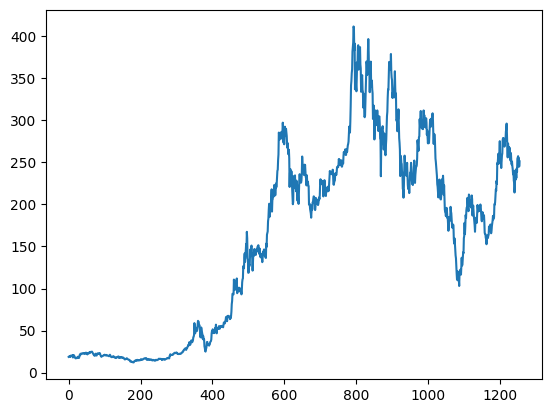

In [9]:
df['Open'].plot()

In [10]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [12]:
#sc.inverse_transform(training_scaled[-60:, 0])

In [13]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 73ms/step - loss: 0.0267
Epoch 2/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0053
Epoch 3/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0043
Epoch 4/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0043
Epoch 5/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0036
Epoch 6/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0046
Epoch 7/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0039
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0034
Epoch 9/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0033
Epoch 10/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0033
Epoch 11/100
24/24 [==============================] - 2s 96ms/step - loss: 0.0037
Epoch 12/100
24/24 [==============================] - 2s 86ms/step - loss: 0.0032
Epoch 13/100
24/24 [=====

In [15]:
print(algo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [16]:
'''data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
print(len(x_test[0]))
x_test = np.array(x_test)
print(x_test[0])
x_test.shape'''

'data_train = df.iloc[:800, 1:2]\ndata_test = df.iloc[800:, 1:2]\ndata_total = pd.concat((data_train, data_test), axis = 0)\ntotal_input = data_total[len(data_total) - len(data_test) - 60:].values\ntotal_input = total_input.reshape(-1,1)\ntotal_input = sc.transform(total_input)\nx_test = []\nfor iter in range(60, 519):\n    x_test.append(total_input[iter-60:iter, 0])\nprint(len(x_test[0]))\nx_test = np.array(x_test)\nprint(x_test[0])\nx_test.shape'

In [17]:
"""data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Modify the loop to create a 2D array
for iter in range(60, 519):
    x_test.append(list(total_input[iter-60:iter, 0]))

# Convert x_test to a NumPy array
x_test = np.array(x_test)

# Reshape x_test to have the shape (459, 60)
x_test = x_test.reshape((x_test.shape[0], 60))

print(x_test.shape)  # Should print (459, 60)"""


'data_train = df.iloc[:800, 1:2]\ndata_test = df.iloc[800:, 1:2]\ndata_total = pd.concat((data_train, data_test), axis=0)\ntotal_input = data_total[len(data_total) - len(data_test) - 60:].values\ntotal_input = total_input.reshape(-1, 1)\ntotal_input = sc.transform(total_input)\nx_test = []\n\n# Modify the loop to create a 2D array\nfor iter in range(60, 519):\n    x_test.append(list(total_input[iter-60:iter, 0]))\n\n# Convert x_test to a NumPy array\nx_test = np.array(x_test)\n\n# Reshape x_test to have the shape (459, 60)\nx_test = x_test.reshape((x_test.shape[0], 60))\n\nprint(x_test.shape)  # Should print (459, 60)'

In [18]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Calculate the maximum number of sequences of length 60 that can be created
max_sequences = len(total_input) - 60 + 1

# Modify the loop to create a 2D array
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+60, 0])

# Convert x_test to a NumPy array
x_test = np.array(x_test)

print(x_test.shape)  # Should print (max_sequences, 60)


(457, 60)


In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
print(predicted_price.shape)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(457, 60, 1)
15/15 [==============================] - 1s 18ms/step
(457, 1)
(457, 1)


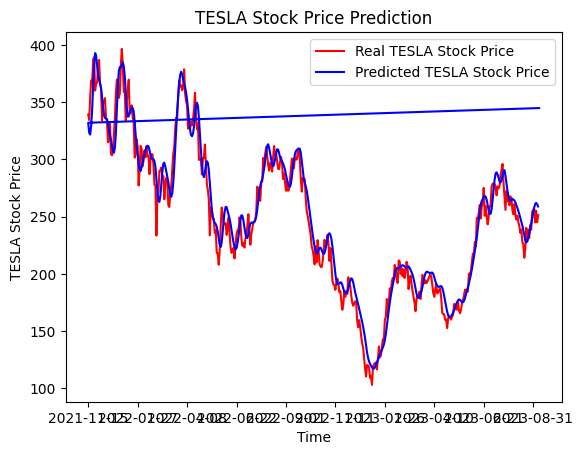

In [20]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[799:, 'Date'],predicted_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


In [29]:
X=testing[-60:]

In [30]:
X.shape

(60, 1)

In [31]:
X=sc.fit_transform(X)

In [32]:
X=np.reshape(X,(1,60,1))

In [33]:
close=algo.predict(X)

1/1 [==============================] - 0s 24ms/step


In [35]:
y=sc.inverse_transform(close)

In [36]:
y

array([[254.71523]], dtype=float32)